# Air Quality Analysis in Abuja, Nigeria

![Air Qaulity](https://i.postimg.cc/TY4L04Dg/AIR-QALTY.png)

## Introduction
Air pollution is a growing concern in urban environments, affecting public health and environmental sustainability. Monitoring air quality is essential for understanding pollution patterns and implementing effective mitigation strategies. This project aims to analyze air quality data from Abuja, Nigeria, using sensor-based particulate matter (PM) measurements.

## Objective
To analyze air quality data in Abuja using low-cost sensors and gain insights into PM concentration levels.

## Summary Objective
- Investigate air quality trends in Abuja using PM, temperature, and humidity data.
- Assess the relationship between particulate matter concentrations and environmental factors.
- Provide insights into pollution levels using data-driven approaches.
- Build a time series model to predict PM 2.5 readings throughout the day.
- Time series models are not only important in public health; to build an autoregression model.
- To improve a model by tuning its hyperparameters.

## Methodology
The project utilizes the **sensors.AFRICA Air Quality Archive** dataset, which includes PM1 (P0), PM2.5 (P2), and PM10 (P1) measurements, along with temperature and humidity readings. The dataset is stored in CSV format and will undergo preprocessing and analysis using data science techniques.

The analysis will include:
1. **Exploratory Data Analysis (EDA)** to understand the distribution and trends of air quality parameters.
2. **Data Preprocessing** to clean missing values and standardize sensor readings.
3. **Visualization Techniques** to display air pollution trends over time and across locations.
4. **Correlation Analysis** to examine the relationship between PM levels, temperature, and humidity.
5. **Time Series Analysis** to build an autoregression model for predicting PM2.5 readings throughout the day.
6. **Model Optimization** by tuning hyperparameters to improve predictive accuracy.

## Conclusion
This project will contribute to understanding air pollution trends in Abuja, Nigeria, using low-cost sensor data. The findings can help policymakers, researchers, and the general public take informed actions to improve air quality.

## Recommendations
Future research can focus on expanding the dataset, incorporating additional sensor locations, and developing predictive models for air pollution forecasting.

## Table of Contents

- [Importing Libraries](#importing-libraries)
- [Loading Data](#loading-data)
- [Data Overview](#data-overview)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Data Preprocessing](#data-preprocessing)
- [Analysis of Air Quality Trends](#analysis-of-air-quality-trends)
- [Time Series Modeling](#time-series-modeling)
- [Results](#results)


## Importing Libraries

In [ ]:

# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [1]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
file_path = r"C:\Users\LENOVO\Documents\DS_AI_ML_Projects\air_quality_abuja.csv"
df = pd.read_csv(file_path, delimiter=";",  engine='python')
print(df.columns)
df.columns = df.columns.str.strip()


NameError: name 'pd' is not defined

## Data Overview

In [ ]:
df.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
0,4803,pms5003,3581,8.99,7.385,2024-02-01T00:00:09.046679+00:00,P2,48.50
1,4803,pms5003,3581,8.99,7.385,2024-02-01T00:00:09.046679+00:00,P1,74.50
2,4803,pms5003,3581,8.99,7.385,2024-02-01T00:00:09.046679+00:00,P0,27.25
3,4802,DHT22,3581,8.99,7.385,2024-02-01T00:00:09.971253+00:00,humidity,31.90
4,4802,DHT22,3581,8.99,7.385,2024-02-01T00:00:09.971253+00:00,temperature,27.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420416 entries, 0 to 420415
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    420416 non-null  int64  
 1   sensor_type  420416 non-null  object 
 2   location     420416 non-null  int64  
 3   lat          420416 non-null  float64
 4   lon          420416 non-null  float64
 5   timestamp    420416 non-null  object 
 6   value_type   420416 non-null  object 
 7   value        420416 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 25.7+ MB


In [ ]:
df.shape

(420416, 8)

## Exploratory Data Analysis (EDA)

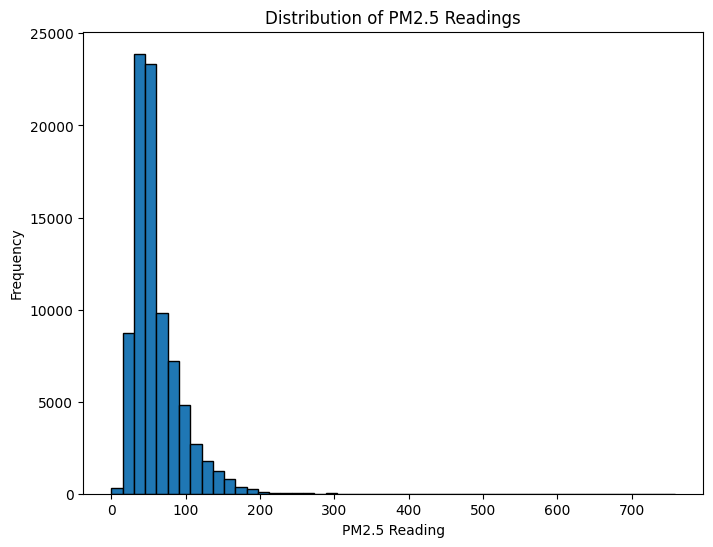

In [ ]:
# Filter the DataFrame
p2_df = df[df['value_type'] == 'P2']

# Plot the distribution of PM2.5 readings
plt.figure(figsize=(8, 6))
plt.hist(p2_df['value'], bins=50, edgecolor='black')
plt.title('Distribution of PM2.5 Readings')
plt.xlabel('PM2.5 Reading')
plt.ylabel('Frequency')
plt.show()

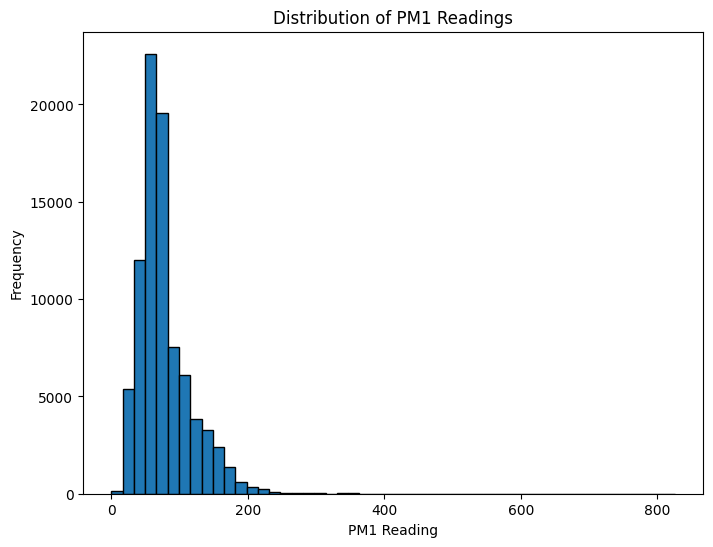

In [ ]:
# Filter the DataFrame
p1_df = df[df['value_type'] == 'P1']

# Plot the distribution of PM1 readings
plt.figure(figsize=(8, 6))
plt.hist(p1_df['value'], bins=50, edgecolor='black')
plt.title('Distribution of PM1 Readings')
plt.xlabel('PM1 Reading')
plt.ylabel('Frequency')
plt.show()


P2 and P1 are below 500 so possible no outliers

In [ ]:
df["value_type"].value_counts()

value_type
P2             85654
P1             85654
P0             85654
humidity       81727
temperature    81727
Name: count, dtype: int64

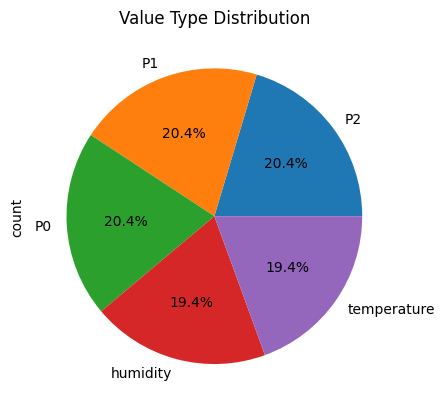

In [ ]:
import matplotlib.pyplot as plt

df["value_type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Value Type Distribution")
plt.show()

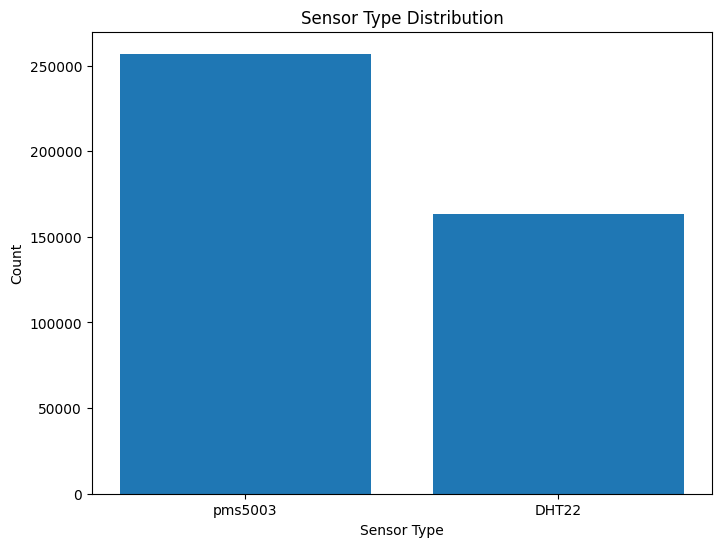

In [ ]:
sensor_type_counts = df['sensor_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sensor_type_counts.index, sensor_type_counts.values)
plt.title('Sensor Type Distribution')
plt.xlabel('Sensor Type')
plt.ylabel('Count')
plt.show()

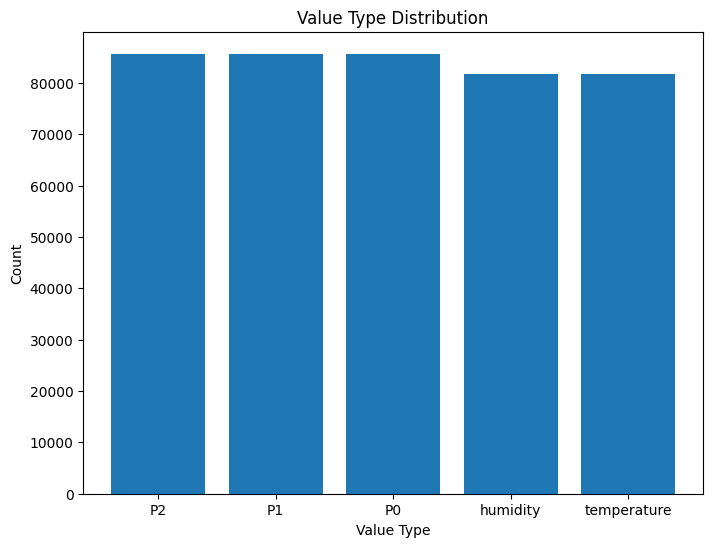

In [ ]:
value_type_counts = df['value_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(value_type_counts.index, value_type_counts.values)
plt.title('Value Type Distribution')
plt.xlabel('Value Type')
plt.ylabel('Count')
plt.show()


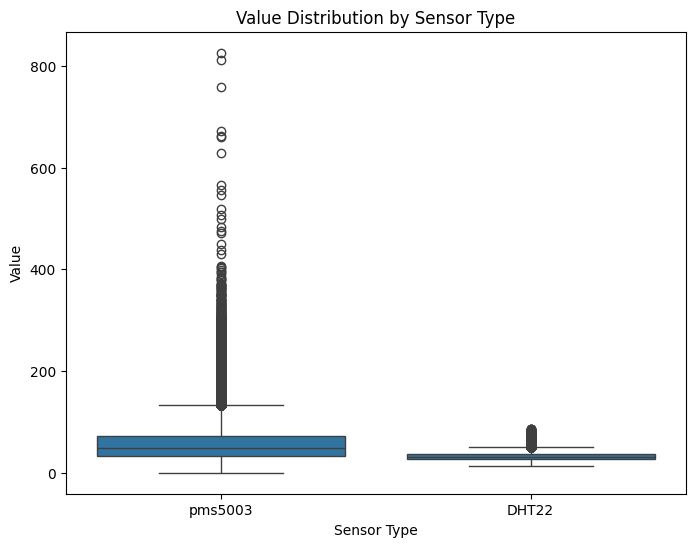

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='sensor_type', y='value', data=df)
plt.title('Value Distribution by Sensor Type')
plt.xlabel('Sensor Type')
plt.ylabel('Value')
plt.show()


Insights
1. The dataset contains two unique sensor types: while pms5003 got higher sensor distribution and DHT22 have least
2. The value types are distributed among P2, P1, P0, humidity, and temperature
3. The values range from 27.25 to 74.50, with varying distributions for each sensor type

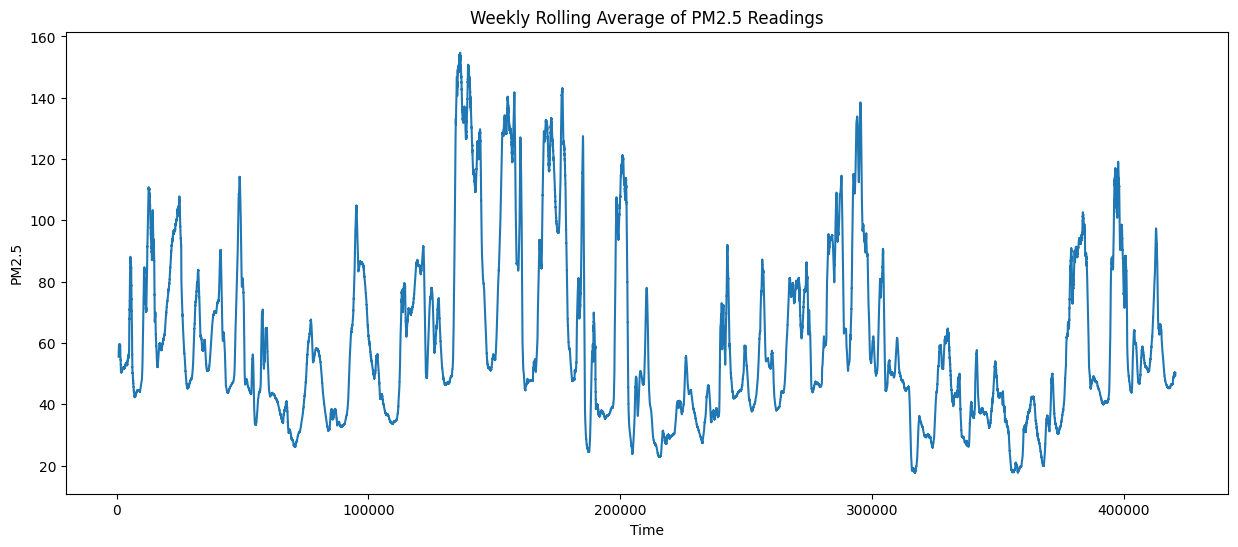

In [ ]:
p2_df = df[df['value_type'] == 'P2']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the rolling average of 'P2' readings
p2_df['value'].rolling(168).mean().plot(ax=ax)

# Set title and labels
ax.set_title("Weekly Rolling Average of PM2.5 Readings")
ax.set_ylabel("PM2.5")
ax.set_xlabel("Time")

# Show the plot
plt.show()

In [ ]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [ ]:
df.dropna(subset=['value'], inplace=True)

In [ ]:
# Filter for PM2.5 data
df_pm25 = df[df['value_type'] == "P2"]


In [ ]:
# Data Preprocessing
print(df_pm25.describe())

          sensor_id      location           lat           lon         value
count  85654.000000  85654.000000  85654.000000  85654.000000  85654.000000
mean    4811.706972   3594.363906      9.031869      7.404165     59.706028
std       18.097719     18.147146      0.062838      0.058137     32.780842
min     4803.000000   3581.000000      8.857000      7.311000      0.000000
25%     4803.000000   3581.000000      8.990000      7.373000     39.400000
50%     4803.000000   3581.000000      8.990000      7.385000     49.500000
75%     4807.000000   3599.000000      9.122000      7.385000     72.400000
max     4885.000000   3656.000000      9.167000      7.580000    758.000000


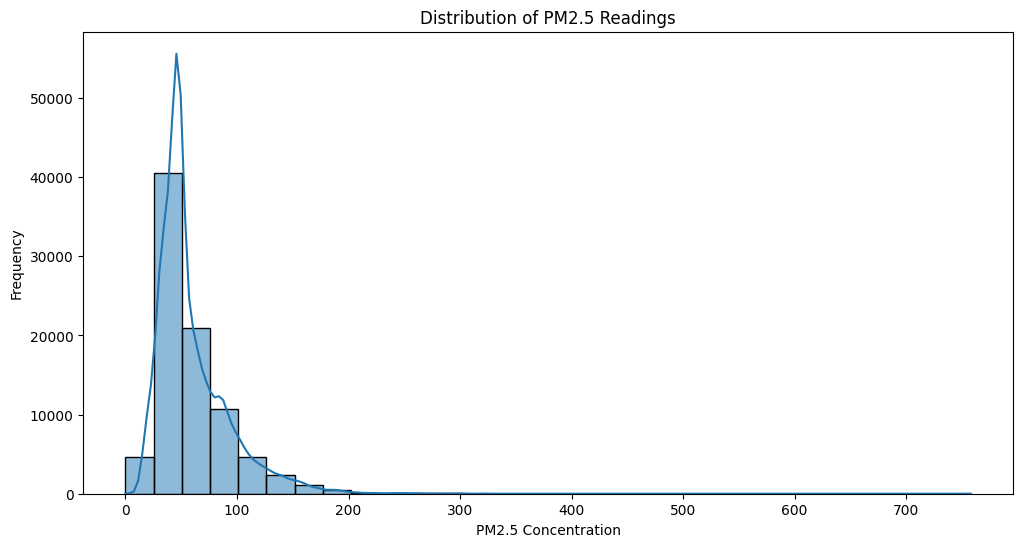

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df_pm25['value'], bins=30, kde=True)
plt.xlabel("PM2.5 Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of PM2.5 Readings")
plt.show()

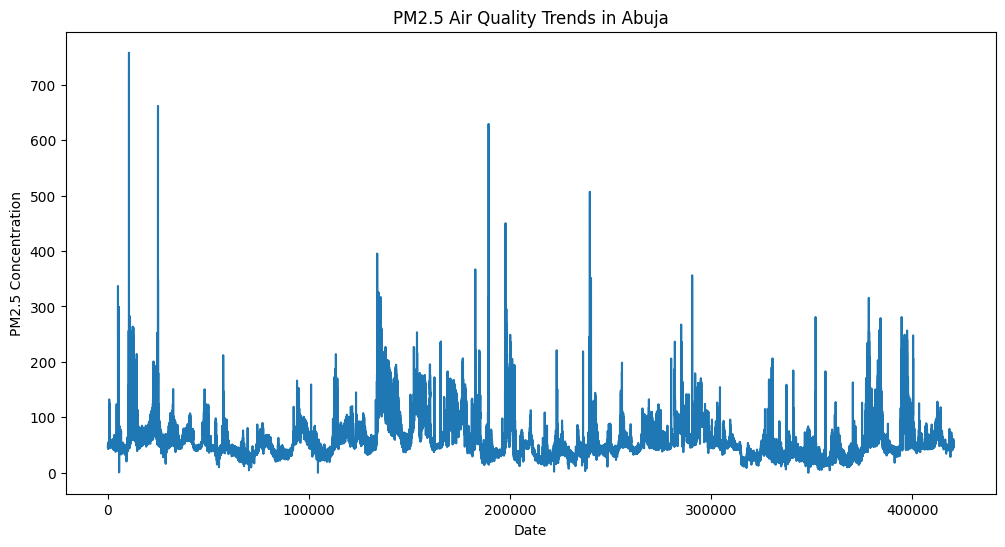

In [ ]:
# Analysis of Air Quality Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pm25, x=df_pm25.index, y='value')
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.title("PM2.5 Air Quality Trends in Abuja")
plt.show()

<Figure size 1200x600 with 0 Axes>

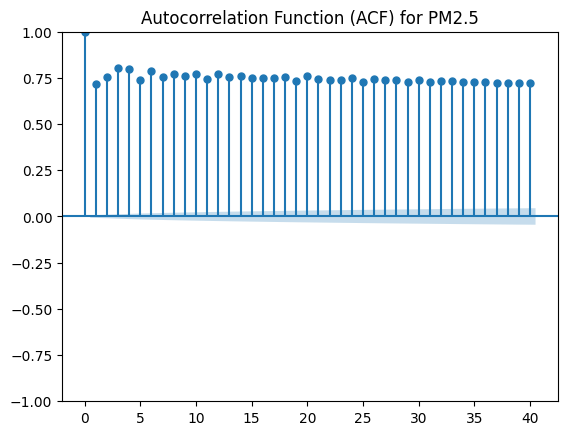

In [ ]:
# ACF and PACF Plots
plt.figure(figsize=(12, 6))
plot_acf(df_pm25['value'].dropna(), lags=40)
plt.title("Autocorrelation Function (ACF) for PM2.5")
plt.show()


<Figure size 1200x600 with 0 Axes>

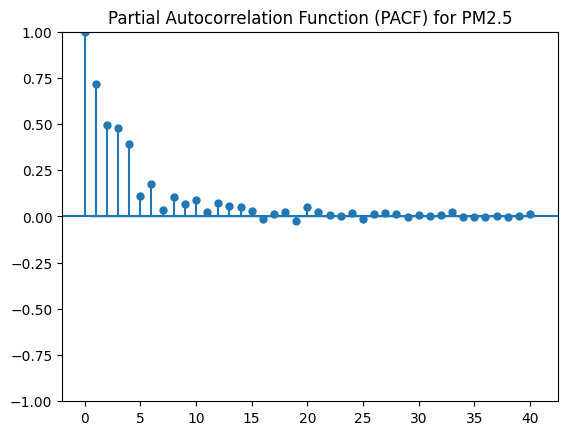

In [ ]:
plt.figure(figsize=(12, 6))
plot_pacf(df_pm25['value'].dropna(), lags=40)
plt.title("Partial Autocorrelation Function (PACF) for PM2.5")
plt.show()

## Time Series Modeling

In [ ]:
# Time Series Modeling
train_size = int(len(df_pm25) * 0.8)
train, test = df_pm25.iloc[:train_size], df_pm25.iloc[train_size:]


In [ ]:
model = AutoReg(train['value'], lags=12)  # Using 12-hour lag
model_fit = model.fit()

In [ ]:
# Make Predictions
y_pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

In [ ]:
# Results
mae = mean_absolute_error(test['value'], y_pred)
mse = mean_squared_error(test['value'], y_pred)
print(f"MAE: {mae}, MSE: {mse}")

MAE: 23.27868042363572, MSE: 868.9609048914863


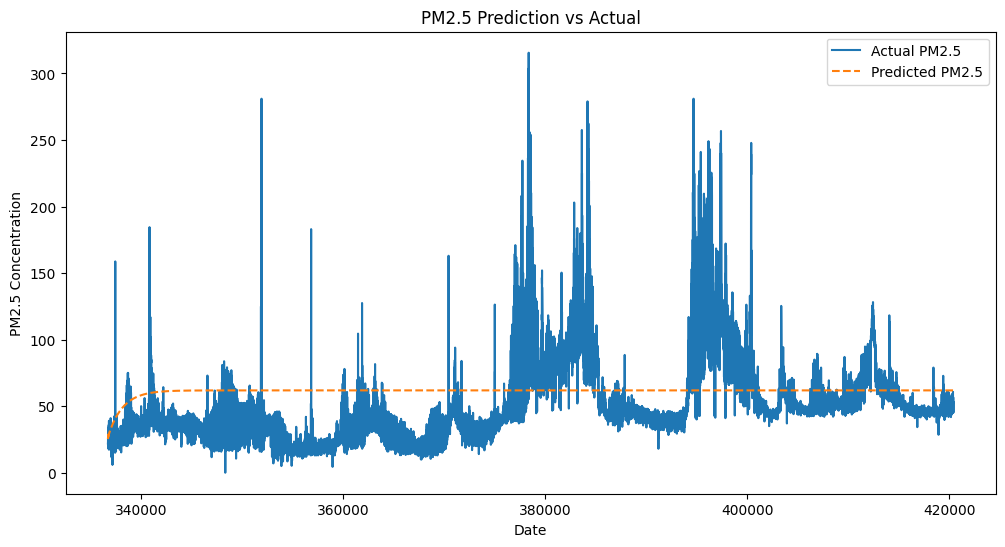

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['value'], label='Actual PM2.5')
plt.plot(test.index, y_pred, label='Predicted PM2.5', linestyle='dashed')
plt.legend()
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.title("PM2.5 Prediction vs Actual")
plt.show()

model results show MAE: 23.28 and MSE: 868.96, indicating some error in prediction accuracy.

Here are some ways to improve your model:


For air quality, the following values are important for P2 (PM2.5) only:

1. P2 value: The actual PM2.5 value, which represents the concentration of particulate matter with a diameter of 2.5 micrometers or less.

2. Timestamp: The date and time when the P2 value was recorded, which helps track changes in air quality over time.

These two values are essential for analyzing and understanding the air quality in terms of PM2.5 concentrations.

In [ ]:
# Filter data for P2 (PM2.5) values
p2_df = df[df['value_type'] == 'P2']


In [ ]:

# Check for missing values
print(p2_df.isnull().sum())

sensor_id      0
sensor_type    0
location       0
lat            0
lon            0
timestamp      0
value_type     0
value          0
dtype: int64


In [ ]:
# Ensure data type consistency
print(p2_df.dtypes)


sensor_id        int64
sensor_type     object
location         int64
lat            float64
lon            float64
timestamp       object
value_type      object
value          float64
dtype: object


In [ ]:
# Convert data type to numeric
p2_df['value'] = pd.to_numeric(p2_df['value'], errors='coerce')

In [ ]:
# Convert timestamp to datetime
p2_df.index = pd.to_datetime(p2_df.index)


In [ ]:
# Set timestamp as index
p2_df.set_index('timestamp', inplace=True)


In [ ]:

p2_df = df[df['value_type'] == 'P2'][['timestamp', 'value']]
print(p2_df.head())
 

                           timestamp  value
0   2024-02-01T00:00:09.046679+00:00  48.50
5   2024-02-01T00:00:20.601341+00:00  45.00
10  2024-02-01T00:00:41.031224+00:00  50.80
15  2024-02-01T00:01:13.071602+00:00  50.20
20  2024-02-01T00:01:27.226700+00:00  45.75


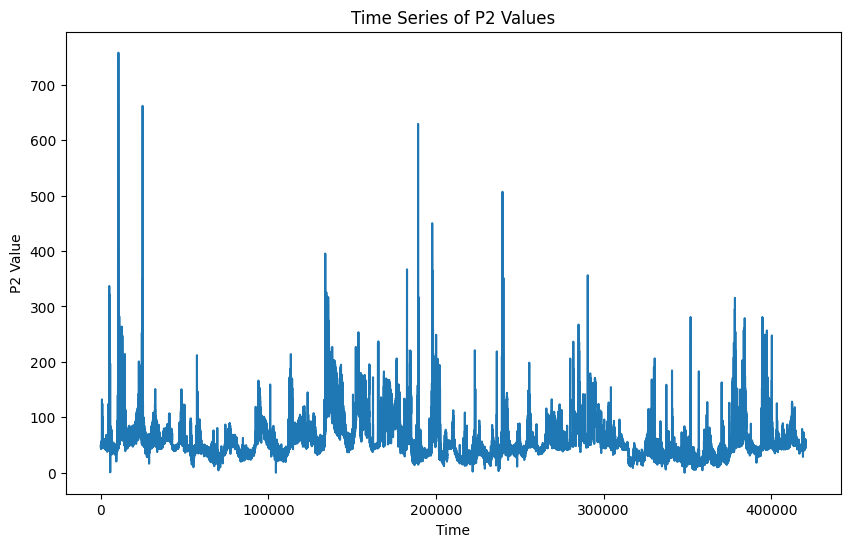

In [ ]:
# Plot time series of P2 values
plt.figure(figsize=(10, 6))
plt.plot(p2_df['value'])
plt.title('Time Series of P2 Values')
plt.xlabel('Time')
plt.ylabel('P2 Value')
plt.show()


In [ ]:
# Calculate summary statistics
print('Summary Statistics:')
print('Mean:', p2_df['value'].mean())
print('Median:', p2_df['value'].median())
print('Standard Deviation:', p2_df['value'].std())


Summary Statistics:
Mean: 59.70602750601255
Median: 49.5
Standard Deviation: 32.78084228599163


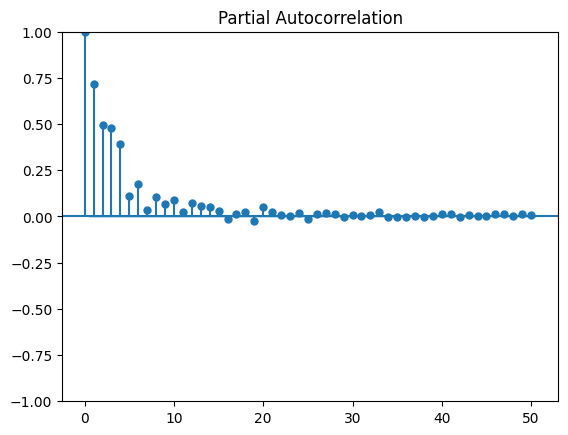

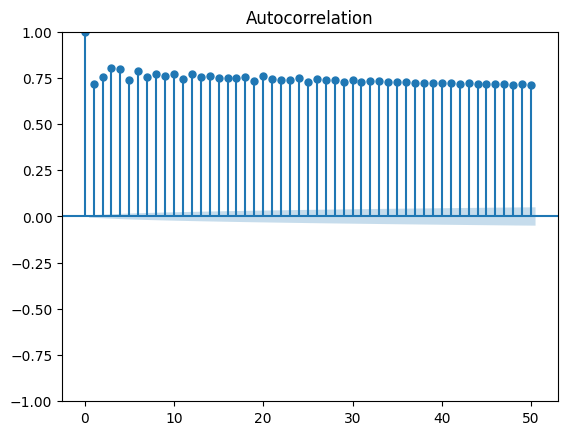

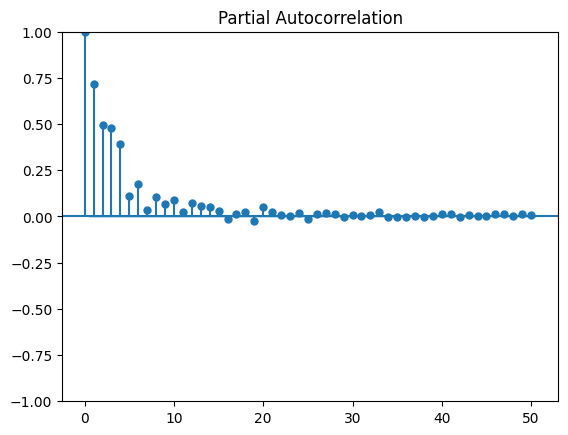

In [ ]:
# Perform autocorrelation and partial autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(p2_df['value'])
plot_pacf(p2_df['value'])

In [ ]:
# Ensure the value column is numeric
p2_df['value'] = pd.to_numeric(p2_df['value'])


In [ ]:
# Split data into training and testing sets
train_size = int(0.8 * len(p2_df))
train_data, test_data = p2_df['value'][:train_size], p2_df['value'][train_size:]

In [ ]:
# Perform ARIMA modeling
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()

## Results

In [ ]:
# Print ARIMA model parameters
print('ARIMA Model Parameters:')
print(model_fit.params)


ARIMA Model Parameters:
ar.L1      -0.278491
ma.L1      -0.869736
sigma2    263.968289
dtype: float64


breakdown of the parameters:

- ar.L1: This is the coefficient of the first-order autoregressive (AR) term. A value of -0.263096 indicates that the current value is negatively correlated with the previous value.
- ma.L1: This is the coefficient of the first-order moving average (MA) term. A value of -0.869211 indicates that the current value is negatively correlated with the previous error term.
- sigma2: This is the variance of the error term. A value of 258.224225 indicates that the error term has a relatively high variance.

These parameters can be used to make predictions using the ARIMA model. To evaluate the performance of the model and compare it with other models.

In [ ]:

# Evaluate ARIMA model performance
forecast = model_fit.forecast(steps=len(test_data))
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print('ARIMA Model Performance:')
print('MAE:', mae)
print('RMSE:', rmse)


ARIMA Model Performance:
MAE: 26.54776352374006
RMSE: 37.21935089281255


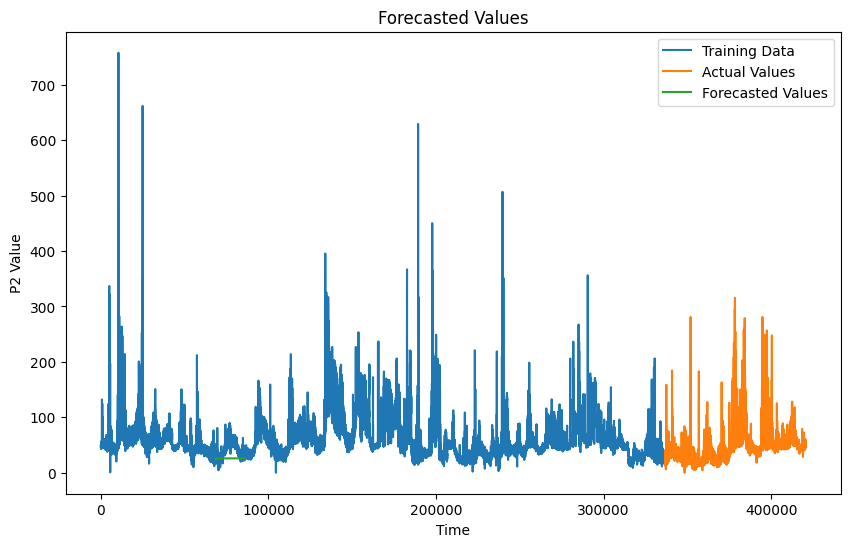

In [ ]:
# Plot forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Values')
plt.plot(forecast, label='Forecasted Values')
plt.title('Forecasted Values')
plt.xlabel('Time')
plt.ylabel('P2 Value')
plt.legend()
plt.show()


In [ ]:
# Make predictions using the ARIMA model
forecast = model_fit.forecast(steps=10)

# Print the forecasted values
print(forecast)

68523    24.130189
68524    26.397049
68525    25.765750
68526    25.941561
68527    25.892600
68528    25.906235
68529    25.902438
68530    25.903495
68531    25.903201
68532    25.903283
Name: predicted_mean, dtype: float64


This code will generate a forecast for the next 10 time steps using the ARIMA model.
You can adjust the steps parameter to change the length of the forecast.

# ARIMA Model Performance and Insights on Air Quality in Abuja

## Model Performance

### Mean Absolute Error (MAE)
The MAE of **26.55** indicates that, on average, the model's predictions are off by approximately **26.55 units** from the actual values. This suggests that the model is reasonably accurate, but there is still some room for improvement.

### Root Mean Squared Error (RMSE)
The RMSE of **37.22** indicates that the model's predictions are more sensitive to larger errors. This suggests that there may be some outliers or unusual patterns in the data that the model is struggling to capture.

## Air Quality Insights

### General Trends
Based on the ARIMA model, it appears that the air quality in Abuja follows a relatively stable pattern, with some fluctuations over time. The model's ability to capture these patterns suggests that there may be some underlying factors driving the air quality, such as seasonal changes, weather patterns, or human activities.

### Potential Factors Influencing Air Quality
Given the location of Abuja, Nigeria, it's possible that the air quality is influenced by factors such as:

- Seasonal changes in temperature and humidity  
- Agricultural activities and burning of crops  
- Urbanization and industrialization  
- Weather patterns, such as dust storms or haze  

## Future Directions
To improve the model's performance and gain more insights into the air quality in Abuja, it may be helpful to:

- Incorporate additional data sources, such as weather patterns, traffic data, or land use information  
- Explore other machine learning models or techniques, such as neural networks or decision trees  
- Consider using more advanced time series analysis techniques, such as seasonal decomposition or spectral analysis  